In [1]:
import torch
import numpy  as np

## numpy 

In [2]:
np_data = np.arange(6).reshape(2,3) 
np_data

array([[0, 1, 2],
       [3, 4, 5]])

## tensor

In [3]:
tensor_data = torch.arange(6).reshape(2,3)
tensor_data

tensor([[0, 1, 2],
        [3, 4, 5]])

## array to tensor

In [4]:
array2torch = torch.from_numpy(np_data)
array2torch 

tensor([[0, 1, 2],
        [3, 4, 5]])

## tensor to array

In [5]:
tensor2array = torch_data.numpy()
tensor2array

NameError: name 'torch_data' is not defined

tensor([[0, 1, 2],
        [3, 4, 5]])

 # 运算符号

In [6]:
data = [-1.-2,1,2]
tensor = torch.FloatTensor(data)
tensor

tensor([-3.,  1.,  2.])

## 点乘

In [7]:
tensor*tensor

tensor([9., 1., 4.])

In [8]:
tensor.abs()

tensor([3., 1., 2.])

In [9]:
tensor.abs_()

tensor([3., 1., 2.])

In [10]:
tensor.sin()

tensor([0.1411, 0.8415, 0.9093])

In [11]:
tensor.cos()

tensor([-0.9900,  0.5403, -0.4161])

In [12]:
tensor.sign()

tensor([1., 1., 1.])

In [13]:
tensor.sigmoid()

tensor([0.9526, 0.7311, 0.8808])

In [14]:
tensor.sigmoid_()

tensor([0.9526, 0.7311, 0.8808])

In [15]:
tensor.dot(tensor)

tensor(2.2176)

In [16]:
tensor+tensor

tensor([1.9051, 1.4621, 1.7616])

In [17]:
tensor*2

tensor([1.9051, 1.4621, 1.7616])

In [18]:
((tensor!=0)).float().dot(torch.ones_like(tensor))

tensor(3.)

In [19]:
np.dot(np.ones((10,1)).T,np.ones((10,1)))

array([[10.]])

In [20]:
torch.dot(torch.ones((10,1)).t()[0],torch.ones(10))

tensor(10.)

In [21]:
torch.ones((10,1)).squeeze()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
torch.squeeze(torch.ones((10,1)))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## numpy 矩阵相乘

In [23]:
data = [[1,2],[3,4]]
np.matmul(data,data)

array([[ 7, 10],
       [15, 22]])

In [25]:
np.array(data).dot(np.array(data))

array([[ 7, 10],
       [15, 22]])

## torch矩阵相乘

In [27]:
#data转成tensor形式
tensor = torch.FloatTensor(data)
torch.mm(tensor,tensor)

tensor([[ 7., 10.],
        [15., 22.]])

In [34]:
from torch.autograd import Variable

In [35]:
tensor  = torch.FloatTensor([[1,2],[3,4]])
tensor

tensor([[1., 2.],
        [3., 4.]])

In [58]:
variable = Variable(tensor,requires_grad=True) # 计算反向传播的梯度的计算图
variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [59]:
t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)
# 上面的额计算表示的是 > v_out = 1/4*sum(variable*variable)
# d(v_out) /d(var) = 1/4*2*varible = variable/2
print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [60]:
v_out.backward() # 计算梯度反向传播
print(variable.grad)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [61]:
variable.data #返回variable的数据

tensor([[1., 2.],
        [3., 4.]])

In [62]:
variable.data.numpy() # variable转numpy要先转tensor形式再转numpy

array([[1., 2.],
       [3., 4.]], dtype=float32)

## 线性 linear
## 非线性 nonliner
## $ y = Wx  , W 是参数 ，y是预测值，x是输入值$
## 但是上面那个是线性方程不能解决非线性问题，于是需要激励函数
## $ y = AF(Wx)  AF: Activation function  用来将线性的关系弯曲到贴合数据情况$
## 常用的非线性激励函数有 sorfmax ReLU tanh 
## 也可以自定义激烈函数，但是必须是可微分的
## 当神经网络比较浅，比如两三层，激励函数随便用，但是当层数过多的时候，就要选择适合的函数，否则会碰到梯度爆炸，梯度消失的问题
## 卷积神经网络推荐ReLU,循环神经网络推荐relu / tanh

In [63]:
import torch
import torch.nn.functional as F # nn是pytroch里的神經網絡模塊
from torch.autograd import Variable # Variable 是圖模塊
import matplotlib.pyplot as plt

In [64]:
# fake data
x = torch.linspace(-5,5,200)
x = Variable(x)
x_np = x.data.numpy()#Vatiable不能直接用matplotlib畫圖，所以要转numpy的形式

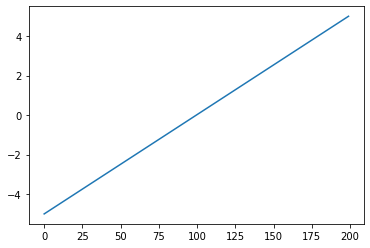

In [66]:
plt.plot(x_np)

## softmax

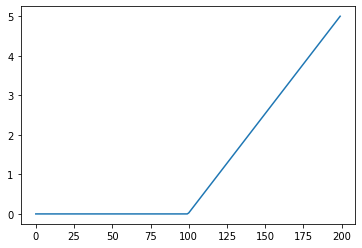

In [84]:
y_relu1 = F.relu(x,inplace=True).data.numpy()
y_relu2 = F.relu(x,inplace=False).data.numpy()
#y_softmax = F.softmax(x).data.numpy() #计算概率的激励函数，不是计算线图的
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).numpy()
y_softmin = F.softmin(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

plt.plot(y_relu1)

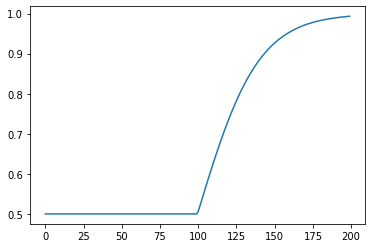

In [86]:
plt.plot(y_sigmoid)

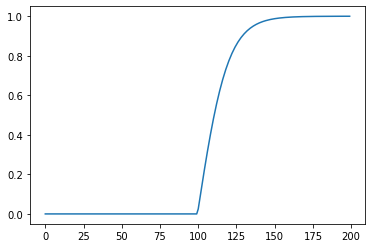

In [87]:
plt.plot(y_tanh)

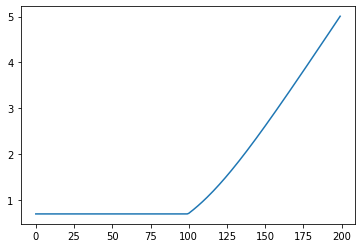

In [88]:
plt.plot(y_softplus)

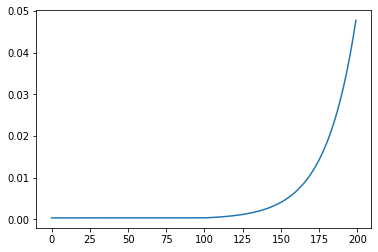

In [89]:
plt.plot(y_softmax)

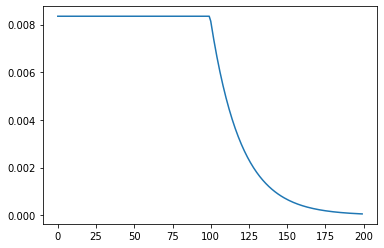

In [90]:
plt.plot(y_softmin)

## Pytroch 回归神经网络

In [91]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [95]:
srcx = torch.linspace(-1,1,100)
x = torch.unsqueeze(srcx,dim=1) # torch只处理二维数据，所以要把数据升维

y = x.pow(2) + 0.2 * torch.rand(x.size())
srcx.shape,x.shape,y.shape

(torch.Size([100]), torch.Size([100, 1]), torch.Size([100, 1]))

In [104]:
#plt.scatter(x,y) 

In [102]:
## 把x,y 变成 Variable 因为神经网络只能输入Variable
x,y = Variable(x),Variable(y)

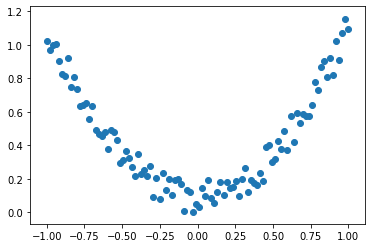

In [103]:
plt.scatter(x,y)

In [107]:
class Net(torch.nn.Module): # torch.nn.Module net的主模块
    def __init__(self,n_features,n_hidden,n_output):
        '''
        n_features 数据个数
        n_hidden 隐藏层的神经元的个数
        n_output
        '''
        super(Net,self).__init__() #要继承模块的信息
        self.hidden = torch.nn.Linear(n_features,n_hidden) # 隐藏层，输入的内容是他有多少哥输入和输出
        self.predict = torch.nn.Linear(n_hidden,n_output) # 输出预测层，输入的内容是

    def forward(self,x):
        '''前向传播'''
        x = F.relu(self.hidden(x)) #过一遍hidden传入上面定义的线性神经网络处理的函数中
        x = self.predict(x)
        return x


# 定义一个神经网络，1个维度的输入，10个神经元，1个隐藏层

In [200]:
net = Net(1,10,1)


## 查看神经网络的结构信息

In [201]:

'''
Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
'''
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

In [202]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.005)#lr是学习率
loss_func = torch.nn.MSELoss()
for t in range(10000):
    prediction = net(x) # 调用图神经网络
    #print(prediction)
    loss = loss_func(prediction,y) # 计算y值的误差
    optimizer.zero_grad() #梯度下降的终点设置为0
    loss.backward() #设置反向传播
    optimizer.step()

In [203]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.1643],
           [-0.2481],
           [ 0.9044],
           [-0.9304],
           [ 0.5434],
           [ 0.5054],
           [ 0.4631],
           [-0.4551],
           [ 0.6456],
           [ 0.8825]], requires_grad=True),
   Parameter containing:
   tensor([-0.0162,  0.3541,  0.0916, -0.0677, -0.3740, -0.5439,  0.8945,  0.1740,
            0.0274, -0.3240], requires_grad=True),
   Parameter containing:
   tensor([[ 0.1251,  0.2080,  0.3681,  0.7499,  0.0749,  0.0051, -0.1197,  0.3187,
             0.6089,  0.7113]], requires_grad=True),
   Parameter containing:
   tensor([-0.0310], requires_grad=True)],
  'lr': 0.005,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False}]

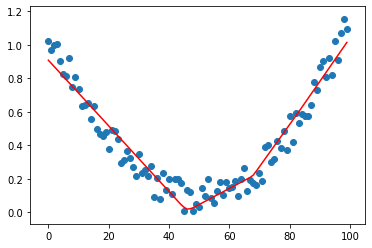

In [204]:
plt.plot(prediction.data.numpy(),c='r')
plt.scatter(range(y.shape[0]),y)

## 调用参数预测

In [205]:
# 新的x
newx = torch.rand_like(x)

## 调用前向传播预测结果

In [206]:
yhat = net.forward(newx)

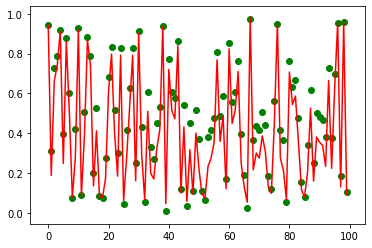

In [207]:
plt.plot(yhat.data.numpy(),c='r')
plt.scatter(range(x.shape[0]),newx.data.numpy(),c='g')